In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew,kurtosis

import scipy as stats
from scipy.stats import norm , skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold ,cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
file_name = 'Data_Train.xlsx' 
train = pd.read_excel(file_name)

In [3]:
file_name1 = 'Test_set.xlsx' 
test= pd.read_excel(file_name1)

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train.shape

(10683, 11)

In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train.shape

(10682, 11)

In [11]:
test.shape

(2671, 10)

In [12]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [13]:
all_data = pd.concat([train, test], ignore_index=True, sort =False)

In [14]:
all_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [15]:
all_data.shape

(13353, 11)

In [16]:
all_data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [17]:
all_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

# Data Exploration

### remove skewness from dataset by using feature transformation

Text(0.5, 0, 'Log-Unit-Price')

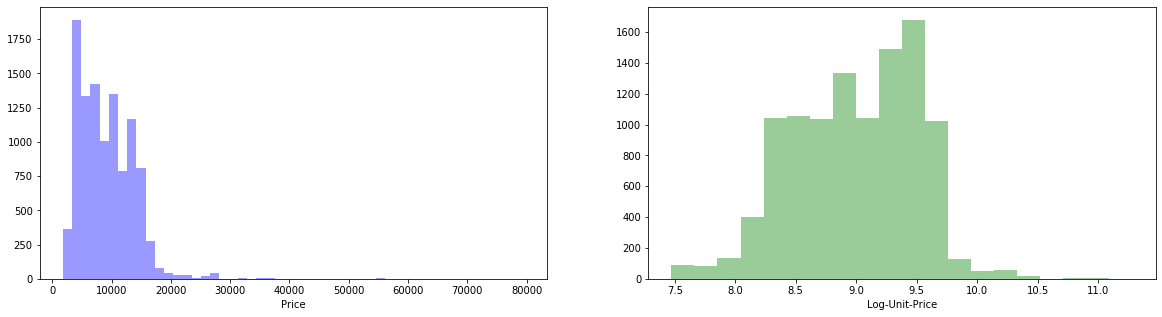

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train.Price, ax=ax[0], kde=False, color="blue")
sns.distplot(np.log(train.Price), ax=ax[1], bins=20, color="green", kde=False)
ax[1].set_xlabel("Log-Unit-Price")

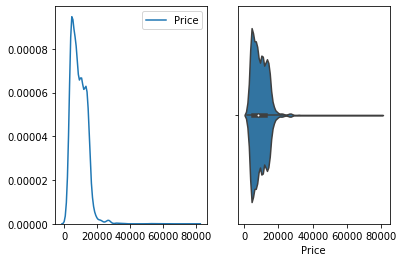

In [19]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(train['Price'], bw=1000, ax=axes[0])
sns.violinplot(train['Price'], ax=axes[1])
plt.show()

In [20]:
train['Price'].skew()

1.812404554693161

In [21]:
np.log(train.Price).skew()

-0.25476338907926027

here,we can see that the price of train data is right skewed after using featurisation price is transformed into log price and finally my column is well balanced.

In [22]:
train["Year"] = pd.DatetimeIndex(train['Date_of_Journey']).year
train["Quarter"] =pd.DatetimeIndex(train['Date_of_Journey']).quarter
train["Month"] = pd.DatetimeIndex(train['Date_of_Journey']).month
train["Week"] = pd.DatetimeIndex(train['Date_of_Journey']).week
train["Weekday"] =pd.DatetimeIndex(train['Date_of_Journey']).weekday
train["Day"] = pd.DatetimeIndex(train['Date_of_Journey']).day
train["Dayofyear"] = pd.DatetimeIndex(train['Date_of_Journey']).dayofyear
train["Date"] = pd.to_datetime(train[['Year', 'Month', 'Day']])

In [23]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,1,3,12,6,24,83,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,1,1,5,5,5,2019-01-05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,3,9,36,4,6,249,2019-09-06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,4,12,49,3,5,339,2019-12-05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,1,1,3,3,3,2019-01-03


In [24]:
train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

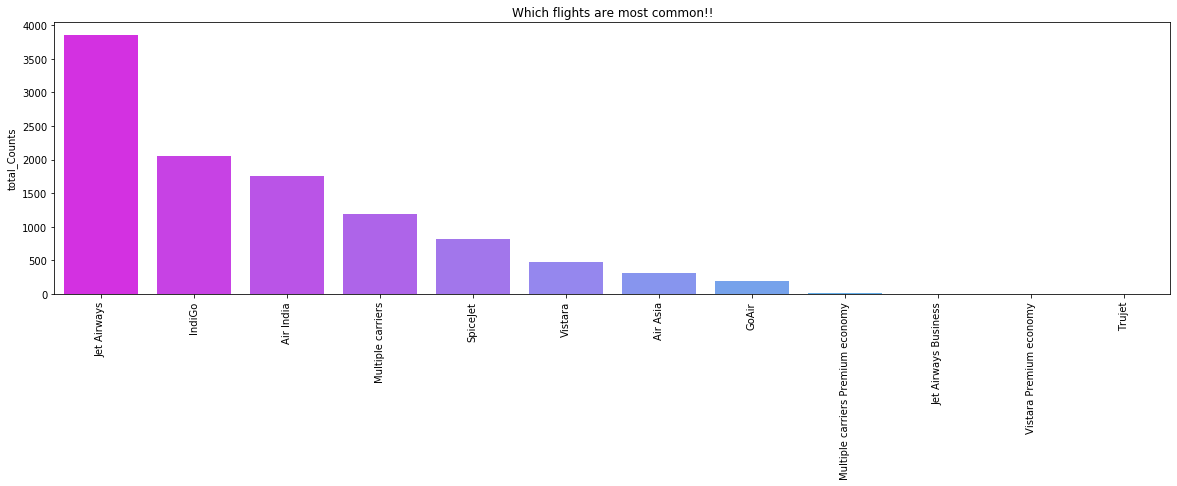

In [25]:
total_flight_count = train.Airline.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(total_flight_count .index, total_flight_count .values, palette="cool_r")
plt.ylabel("total_Counts")
plt.title("Which flights are most common!!")
plt.xticks(rotation=90)

the most common flight used in india is jet airways and least is trujet.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

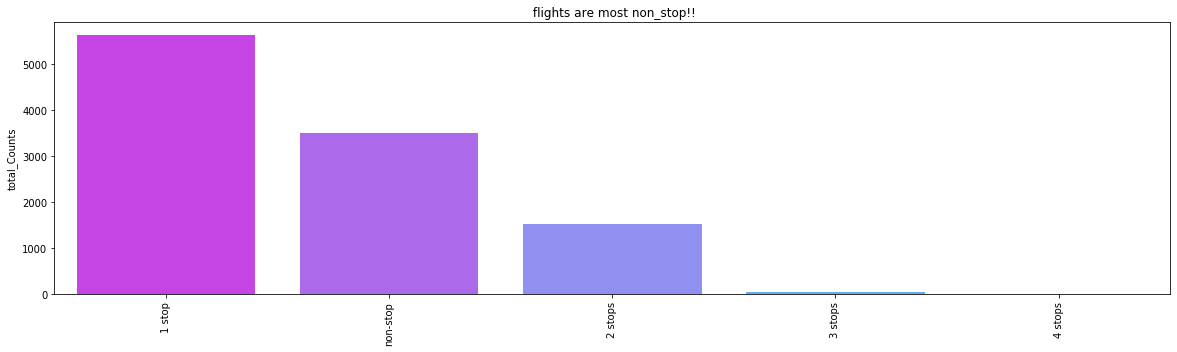

In [26]:
total_stopage_count = train.Total_Stops.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(total_stopage_count .index, total_stopage_count .values, palette="cool_r")
plt.ylabel("total_Counts")
plt.title(" flights are most non_stop!!")
plt.xticks(rotation=90)

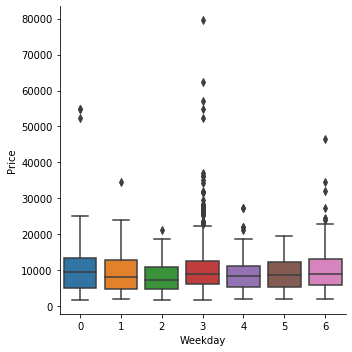

In [27]:
sns.catplot(x="Weekday", y="Price", kind="box", data=train)

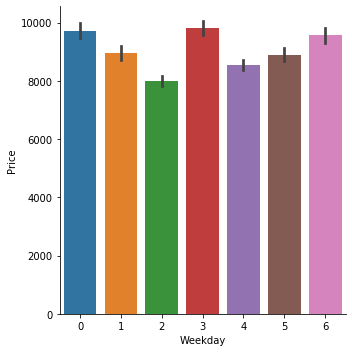

In [28]:
sns.catplot(x="Weekday",y="Price",kind='bar',data=train)

here,we can see that the highest price of flight ticket on '0':'sunday' and wednesday.

# arrival time

In [29]:
all_data['Arrival_Time']= all_data['Arrival_Time'].str.split(' ').str[0]

In [30]:
all_data['Arrival_Hour']= all_data['Arrival_Time'].str.split(':').str[0]
all_data['Arrival_Minute']= all_data['Arrival_Time'].str.split(':').str[1]

all_data['Arrival_Hour']= all_data['Arrival_Hour'].astype(int)
all_data['Arrival_Minute']= all_data['Arrival_Minute'].astype(int)

In [31]:
all_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,21,35


# Departure Time

In [32]:
all_data['Dep_Time']= all_data['Dep_Time'].str.split(' ').str[0]

In [33]:
all_data['Dep_Hour']= all_data['Arrival_Time'].str.split(':').str[0]
all_data['Dep_Minute']= all_data['Arrival_Time'].str.split(':').str[1]

all_data['Dep_Hour']= all_data['Dep_Hour'].astype(int)
all_data['Dep_Minute']= all_data['Dep_Minute'].astype(int)

In [34]:
all_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,1,10,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,13,15,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,4,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,23,30,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,21,35,21,35


In [35]:
all_data["Year"] = pd.DatetimeIndex(all_data['Date_of_Journey']).year
all_data["Quarter"] =pd.DatetimeIndex(all_data['Date_of_Journey']).quarter
all_data["Month"] = pd.DatetimeIndex(all_data['Date_of_Journey']).month
all_data["Week"] = pd.DatetimeIndex(all_data['Date_of_Journey']).week
all_data["Weekday"] =pd.DatetimeIndex(all_data['Date_of_Journey']).weekday
all_data["Day"] = pd.DatetimeIndex(all_data['Date_of_Journey']).day
all_data["Dayofyear"] = pd.DatetimeIndex(all_data['Date_of_Journey']).dayofyear
all_data["Date"] = pd.to_datetime(all_data[['Year', 'Month', 'Day']])

# Total_Stops

In [36]:
all_data['Total_Stops']= all_data['Total_Stops'].replace('non-stop', '0 stop')

In [37]:
all_data['Stop']= all_data['Total_Stops'].str.split(' ').str[0]

In [38]:
all_data['Stop']= all_data['Stop'].astype(int)

In [39]:
all_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Dep_Minute,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,Stop
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,...,10,2019,1,3,12,6,24,83,2019-03-24,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,15,2019,1,1,1,5,5,5,2019-01-05,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,...,25,2019,3,9,36,4,6,249,2019-09-06,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,30,2019,4,12,49,3,5,339,2019-12-05,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,35,2019,1,1,1,3,3,3,2019-01-03,1


# spliting route

The ‘Route’ columns mainly tell us that how many cities they have taken to reach from source to destination.

In [40]:
all_data['Route_1'] = all_data['Route'].str.split('→ ').str[0]
all_data['Route_2'] = all_data['Route'].str.split('→ ').str[1]
all_data['Route_3'] =  all_data['Route'].str.split('→ ').str[2]
all_data['Route_4'] =  all_data['Route'].str.split('→ ').str[4]

replace NaN with none.

In [41]:
all_data['Route_1'].fillna('none',inplace=True) 
all_data['Route_2'].fillna('none',inplace=True)
all_data['Route_3'].fillna('none',inplace=True) 
all_data['Route_4'].fillna('none',inplace=True) 

In [42]:
all_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Week,Weekday,Day,Dayofyear,Date,Stop,Route_1,Route_2,Route_3,Route_4
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,...,12,6,24,83,2019-03-24,0,BLR,DEL,none,none
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,5,5,2019-01-05,2,CCU,IXR,BBI,none
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,...,36,4,6,249,2019-09-06,2,DEL,LKO,BOM,none
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,49,3,5,339,2019-12-05,1,CCU,NAG,BLR,none
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,3,3,3,2019-01-03,1,BLR,NAG,DEL,none


transform categorical variables into numerical variables using label encoder 

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le= LabelEncoder()

In [45]:
all_data['Airline']=le.fit_transform(all_data['Airline'])
all_data['Source']=le.fit_transform(all_data['Source'])
all_data['Destination']=le.fit_transform(all_data['Destination'])
all_data['Additional_Info']=le.fit_transform(all_data['Additional_Info'])
all_data['Route_1']=le.fit_transform(all_data['Route_1'])
all_data['Route_2']=le.fit_transform(all_data['Route_2'])
all_data['Route_3']=le.fit_transform(all_data['Route_3'])
all_data['Route_4']=le.fit_transform(all_data['Route_4'])

In [46]:
all_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Week,Weekday,Day,Dayofyear,Date,Stop,Route_1,Route_2,Route_3,Route_4
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10,2h 50m,0 stop,8,...,12,6,24,83,2019-03-24,0,0,13,30,5
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,8,...,1,5,5,5,2019-01-05,2,2,25,1,5
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,8,...,36,4,6,249,2019-09-06,2,3,32,4,5
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,8,...,49,3,5,339,2019-12-05,1,2,34,3,5
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,8,...,1,3,3,3,2019-01-03,1,0,34,8,5


# drop unwanted columns from all_data


In [47]:
all_data.dtypes

Airline                     int32
Date_of_Journey            object
Source                      int32
Destination                 int32
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info             int32
Price                     float64
Arrival_Hour                int32
Arrival_Minute              int32
Dep_Hour                    int32
Dep_Minute                  int32
Year                        int64
Quarter                     int64
Month                       int64
Week                        int64
Weekday                     int64
Day                         int64
Dayofyear                   int64
Date               datetime64[ns]
Stop                        int32
Route_1                     int32
Route_2                     int32
Route_3                     int32
Route_4                     int32
dtype: object

In [48]:
all_data['Price'].unique()

array([ 3897.,  7662., 13882., ..., 12352., 12648.,    nan])

In [49]:
all_data.drop(["Date_of_Journey",'Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Date'],axis=1,inplace=True)

In [50]:
all_data.dtypes

Airline              int32
Source               int32
Destination          int32
Additional_Info      int32
Price              float64
Arrival_Hour         int32
Arrival_Minute       int32
Dep_Hour             int32
Dep_Minute           int32
Year                 int64
Quarter              int64
Month                int64
Week                 int64
Weekday              int64
Day                  int64
Dayofyear            int64
Stop                 int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
dtype: object

# Modeling

split data in train and test

In [51]:
new_train=all_data[:10683]
new_test=all_data[10683:]
new_test.drop('Price',axis=1).head()

,Airline,Source,Destination,Additional_Info,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Stop,Route_1,Route_2,Route_3,Route_4
10683,3,3,0,8,10,20,10,20,2019,4,12,49,3,5,339,1,2,33,3,5
10684,4,2,1,5,19,0,19,0,2019,2,5,21,1,21,141,1,3,7,6,5
10685,6,2,1,8,21,0,21,0,2019,2,5,21,1,21,141,1,3,7,6,5
10686,0,0,2,8,2,45,2,45,2019,2,6,26,0,24,175,0,0,13,30,5
10687,4,2,1,5,12,35,12,35,2019,4,12,49,4,6,340,1,3,7,6,5


In [52]:
X= new_train.drop('Price',axis=1)
new_train['Price'] = np.log(new_train.Price) 
y= new_train['Price']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
y.unique()

array([8.26796231, 8.94402833, 9.53834832, ..., 9.42157327, 9.44525438,
              nan])

In [54]:
new_train['Price'].unique()

array([8.26796231, 8.94402833, 9.53834832, ..., 9.42157327, 9.44525438,
              nan])

In [55]:
new_train['Price'].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [57]:
y_train.head()

246     9.266437
9715    9.501292
4395    8.658866
9814    8.253488
379     9.313529
Name: Price, dtype: float64

In [58]:
np.exp(y_train).head()

246     10577.0
9715    13377.0
4395     5761.0
9814     3841.0
379     11087.0
Name: Price, dtype: float64

In [59]:
# y_train= np.exp(y_train)
# y_test= np.exp(y_test)

In [60]:
y_test.head()

3774    9.291367
5105    8.770594
4729    9.329367
3393    9.698245
2355    9.563599
Name: Price, dtype: float64

In [61]:
y_train.unique()

array([9.26643711, 9.50129209, 8.65886635, ..., 9.23610558, 9.26539658,
       8.59359852])

# 1. linear regression

In [62]:
lr= LinearRegression()

In [63]:
kfold= KFold(n_splits=50, shuffle=True,random_state=90)

In [64]:
def cv_rmse(model):
    rmse=np.sqrt(-cross_val_score(model,X,y, scoring = "neg_mean_squared_error",cv=kfold))
    return(rmse)

In [65]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [66]:
bench_model= make_pipeline(RobustScaler(),lr).fit(X=X_train, y=y_train)
cv_rmse(bench_model).mean()

0.32704078958931226

In [67]:
bench_model1= make_pipeline(RobustScaler(),lr).fit(X=X_test, y=y_test)
cv_rmse(bench_model).mean()

0.32704078958931226

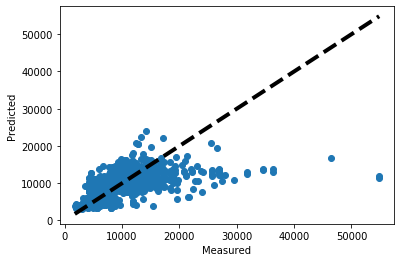

In [68]:
from sklearn.model_selection import cross_val_predict


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y_pred = cross_val_predict(bench_model, X_test,y_test, cv=10)
y_pred= np.exp(y_pred)
y_test_reg= np.exp(y_test)

fig, ax = plt.subplots()
ax.scatter(y_test_reg, y_pred)
ax.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [69]:
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")
def actual_predict(model, X_test, y_test):
    y_pred = cross_val_predict(model, X_test,y_test, cv=10)
    fig, ax = plt.subplots()
    antilog_y_pred= np.exp(y_pred)
    antilog_y_test= np.exp(y_test)
    ax.scatter(antilog_y_test, antilog_y_pred)
    ax.plot([antilog_y_test.min(), antilog_y_test.max()], [antilog_y_test.min(), antilog_y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    return plt.show()

In [70]:
from sklearn.ensemble import RandomForestRegressor

# find best parametrers using gridsearhCV

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = mean_squared_error(y_test, y_pred, squared=False)
    train_RMSE = mean_squared_error(y_train, train_y_pred, squared=False)
                 
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************
[13:02:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

 The best score across ALL searched params:
 0.8842179854451642

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1000, 'subsample'

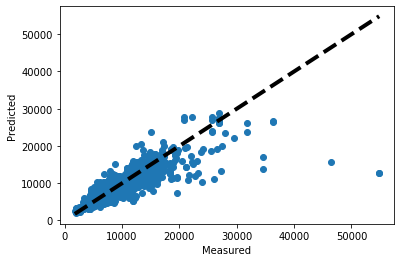

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8846995758799173

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 

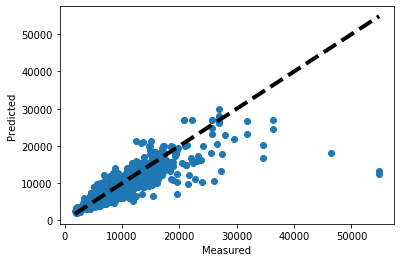

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8558485173537576

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 40}

 The train_RMSE across ALL models:
 0.1854774685535524

 The test_RMSE across ALL models:
 0.1687323899018107



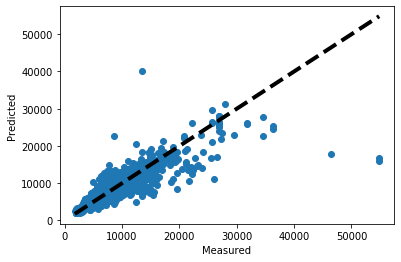

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])
    actual_predict(alg[i],X_test, y_test)

### bar plot of features importances

[13:13:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


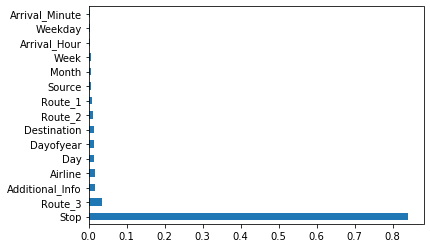

In [74]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(15)
feat_importances.plot(kind='barh')

# save model

In [75]:
import pickle

In [76]:
filename='XGBRegressor_model.sav'

In [77]:
pickle.dump(model, open(filename, 'wb'))

In [78]:
load_lr_model =pickle.load(open(filename, 'rb'))

[13:13:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


extraxt all the columns with order in which they were used

In [79]:
cols_when_model_builds = model.get_booster().feature_names

In [80]:
cols_when_model_builds

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'Arrival_Hour',
 'Arrival_Minute',
 'Dep_Hour',
 'Dep_Minute',
 'Year',
 'Quarter',
 'Month',
 'Week',
 'Weekday',
 'Day',
 'Dayofyear',
 'Stop',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4']

reorder the test dataframe as like train dataframe. 

In [81]:
new_test = new_test[cols_when_model_builds]

In [82]:
new_test.head()

,Airline,Source,Destination,Additional_Info,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Stop,Route_1,Route_2,Route_3,Route_4
10683,3,3,0,8,10,20,10,20,2019,4,12,49,3,5,339,1,2,33,3,5
10684,4,2,1,5,19,0,19,0,2019,2,5,21,1,21,141,1,3,7,6,5
10685,6,2,1,8,21,0,21,0,2019,2,5,21,1,21,141,1,3,7,6,5
10686,0,0,2,8,2,45,2,45,2019,2,6,26,0,24,175,0,0,13,30,5
10687,4,2,1,5,12,35,12,35,2019,4,12,49,4,6,340,1,3,7,6,5


# predict test data 

In [83]:
y_load_predit=load_lr_model.predict(new_test)

In [84]:
y_load_predit

array([8.531954, 9.419663, 9.144203, ..., 9.735931, 9.56526 , 9.237852],
      dtype=float32)

In [85]:
new_test['Price'] =  np.exp(y_load_predit)

In [86]:
new_test.head()

,Airline,Source,Destination,Additional_Info,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Year,Quarter,...,Week,Weekday,Day,Dayofyear,Stop,Route_1,Route_2,Route_3,Route_4,Price
10683,3,3,0,8,10,20,10,20,2019,4,...,49,3,5,339,1,2,33,3,5,5074.350586
10684,4,2,1,5,19,0,19,0,2019,2,...,21,1,21,141,1,3,7,6,5,12328.432617
10685,6,2,1,8,21,0,21,0,2019,2,...,21,1,21,141,1,3,7,6,5,9360.024414
10686,0,0,2,8,2,45,2,45,2019,2,...,26,0,24,175,0,0,13,30,5,3655.719238
10687,4,2,1,5,12,35,12,35,2019,4,...,49,4,6,340,1,3,7,6,5,10509.316406


In [87]:
predi_price = pd.DataFrame(columns=['Price'])

In [88]:
predi_price['Price']= new_test['Price']

In [89]:
predi_price.head()

,Price
10683,5074.350586
10684,12328.432617
10685,9360.024414
10686,3655.719238
10687,10509.316406


# create csv file of flight price prediction.

In [90]:
predi_price.to_csv('predict_flight_price.csv',index=False)